Importing the dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

Importing the data

In [3]:
data = pd.read_csv(r'Datasets/train.csv')

In [4]:
data

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


Data Preprocessing

In [5]:
data.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [6]:
data.drop(columns=['id'],inplace=True)

In [7]:
data['country'].value_counts()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      230130 non-null  object 
 1   country   230130 non-null  object 
 2   store     230130 non-null  object 
 3   product   230130 non-null  object 
 4   num_sold  221259 non-null  float64
dtypes: float64(1), object(4)
memory usage: 8.8+ MB


In [9]:
# Vectorizing the country data

data.replace({'country':{'Canada':0,'Finland':1,'Italy':2,'Kenya':3,'Norway':4,'Singapore':5}}, inplace=True)

C:\Users\Musta\AppData\Local\Temp\ipykernel_26180\642111034.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'country':{'Canada':0,'Finland':1,'Italy':2,'Kenya':3,'Norway':4,'Singapore':5}}, inplace=True)


In [10]:
data['country'].value_counts()

country
0    38355
1    38355
2    38355
3    38355
4    38355
5    38355
Name: count, dtype: int64

In [11]:
#Now handling the dates separating it with year, month and day
data['date'] = pd.to_datetime(data['date'])

In [12]:
data

,date,country,store,product,num_sold
0,2010-01-01,0,Discount Stickers,Holographic Goose,NaN
1,2010-01-01,0,Discount Stickers,Kaggle,973.0
2,2010-01-01,0,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,0,Discount Stickers,Kerneler,423.0
4,2010-01-01,0,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...
230125,2016-12-31,5,Premium Sticker Mart,Holographic Goose,466.0
230126,2016-12-31,5,Premium Sticker Mart,Kaggle,2907.0
230127,2016-12-31,5,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,2016-12-31,5,Premium Sticker Mart,Kerneler,1242.0


In [13]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [14]:
data.drop(columns=['date'],inplace=True)

In [15]:
data

,country,store,product,num_sold,year,month,day
0,0,Discount Stickers,Holographic Goose,NaN,2010,1,1
1,0,Discount Stickers,Kaggle,973.0,2010,1,1
2,0,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
3,0,Discount Stickers,Kerneler,423.0,2010,1,1
4,0,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1
...,...,...,...,...,...,...,...
230125,5,Premium Sticker Mart,Holographic Goose,466.0,2016,12,31
230126,5,Premium Sticker Mart,Kaggle,2907.0,2016,12,31
230127,5,Premium Sticker Mart,Kaggle Tiers,2299.0,2016,12,31
230128,5,Premium Sticker Mart,Kerneler,1242.0,2016,12,31


In [16]:
# handling the store data by removing the spaces between the store names
data['store'] = data['store'].apply(lambda x: x.replace(' ', ''))

In [17]:
data['store'].value_counts()

store
DiscountStickers      76710
StickersforLess       76710
PremiumStickerMart    76710
Name: count, dtype: int64

In [18]:
data

,country,store,product,num_sold,year,month,day
0,0,DiscountStickers,Holographic Goose,NaN,2010,1,1
1,0,DiscountStickers,Kaggle,973.0,2010,1,1
2,0,DiscountStickers,Kaggle Tiers,906.0,2010,1,1
3,0,DiscountStickers,Kerneler,423.0,2010,1,1
4,0,DiscountStickers,Kerneler Dark Mode,491.0,2010,1,1
...,...,...,...,...,...,...,...
230125,5,PremiumStickerMart,Holographic Goose,466.0,2016,12,31
230126,5,PremiumStickerMart,Kaggle,2907.0,2016,12,31
230127,5,PremiumStickerMart,Kaggle Tiers,2299.0,2016,12,31
230128,5,PremiumStickerMart,Kerneler,1242.0,2016,12,31


In [19]:
data['product'].value_counts()

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

In [20]:
# Vectorizing the product data
# handling the store data by removing the spaces between the store names
data['product'] = data['product'].apply(lambda x: x.replace(' ', ''))

In [21]:
data

,country,store,product,num_sold,year,month,day
0,0,DiscountStickers,HolographicGoose,NaN,2010,1,1
1,0,DiscountStickers,Kaggle,973.0,2010,1,1
2,0,DiscountStickers,KaggleTiers,906.0,2010,1,1
3,0,DiscountStickers,Kerneler,423.0,2010,1,1
4,0,DiscountStickers,KernelerDarkMode,491.0,2010,1,1
...,...,...,...,...,...,...,...
230125,5,PremiumStickerMart,HolographicGoose,466.0,2016,12,31
230126,5,PremiumStickerMart,Kaggle,2907.0,2016,12,31
230127,5,PremiumStickerMart,KaggleTiers,2299.0,2016,12,31
230128,5,PremiumStickerMart,Kerneler,1242.0,2016,12,31


In [22]:
data['product'].value_counts()

product
HolographicGoose    46026
Kaggle              46026
KaggleTiers         46026
Kerneler            46026
KernelerDarkMode    46026
Name: count, dtype: int64

Now lets us perform one hot encoding 

In [23]:
#One Hot Encoding
columns_to_encode = ['country', 'product']

encoder = OneHotEncoder(sparse_output=False)  # drop='first' avoids the dummy variable trap

encoded_columns = encoder.fit_transform(data[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

data = pd.concat([data.drop(columns_to_encode, axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [24]:
encoded_df

,country_0,country_1,country_2,country_3,country_4,country_5,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
230125,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
230126,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
230127,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
230128,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [25]:
data.replace({'store':{'DiscountStickers':0,'StickersforLess':1,'PremiumStickerMart':2}},inplace=True)

C:\Users\Musta\AppData\Local\Temp\ipykernel_26180\1851521634.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'store':{'DiscountStickers':0,'StickersforLess':1,'PremiumStickerMart':2}},inplace=True)


In [26]:
data.replace({'year':{2010:0,2011:1,2012:2,2013:3,2014:4,2015:5,2016:6}},inplace=True)

In [27]:
data

,store,num_sold,year,month,day,country_0,country_1,country_2,country_3,country_4,country_5,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode
0,0,NaN,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,973.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,906.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,423.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,491.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,2,466.0,6,12,31,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
230126,2,2907.0,6,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
230127,2,2299.0,6,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
230128,2,1242.0,6,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   store                     230130 non-null  int64  
 1   num_sold                  221259 non-null  float64
 2   year                      230130 non-null  int32  
 3   month                     230130 non-null  int32  
 4   day                       230130 non-null  int32  
 5   country_0                 230130 non-null  float64
 6   country_1                 230130 non-null  float64
 7   country_2                 230130 non-null  float64
 8   country_3                 230130 non-null  float64
 9   country_4                 230130 non-null  float64
 10  country_5                 230130 non-null  float64
 11  product_HolographicGoose  230130 non-null  float64
 12  product_Kaggle            230130 non-null  float64
 13  product_KaggleTiers       230130 non-null  f

In [29]:
data['num_sold'].value_counts().head(10)

num_sold
5.0     1947
6.0     1703
16.0    1434
7.0     1382
15.0    1365
14.0    1360
17.0    1338
18.0    1236
13.0    1172
19.0    1117
Name: count, dtype: int64

In [30]:
data['year'].value_counts()

year
2    32940
6    32940
0    32850
1    32850
3    32850
4    32850
5    32850
Name: count, dtype: int64

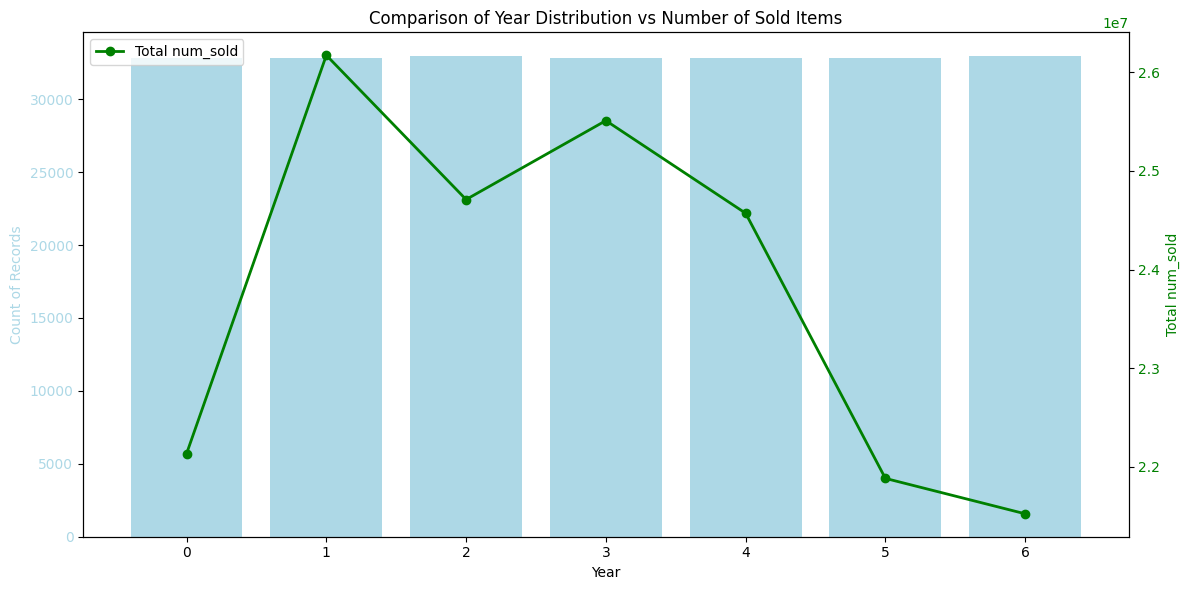

In [31]:
import matplotlib.pyplot as plt

# Count of records per year
year_counts = data['year'].value_counts().sort_index()

# Sum of 'num_sold' per year (or you can use 'mean' depending on your preference)
num_sold_per_year = data.groupby('year')['num_sold'].sum().sort_index()

# Create subplots to compare the two distributions
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the year distribution on the left axis
ax1.bar(year_counts.index, year_counts.values, color='lightblue', label='Year Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of Records', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.set_title('Comparison of Year Distribution vs Number of Sold Items')

# Create a second y-axis to plot num_sold per year
ax2 = ax1.twinx()
ax2.plot(num_sold_per_year.index, num_sold_per_year.values, color='green', marker='o', label='Total num_sold', linestyle='-', linewidth=2)
ax2.set_ylabel('Total num_sold', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Show the plot
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()


In [32]:
data['num_sold'] = data['num_sold'].fillna(method='ffill')

# Then apply backward fill to handle any remaining NaN values
data['num_sold'] = data['num_sold'].fillna(method='bfill')

C:\Users\Musta\AppData\Local\Temp\ipykernel_26180\2714245344.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['num_sold'] = data['num_sold'].fillna(method='ffill')
C:\Users\Musta\AppData\Local\Temp\ipykernel_26180\2714245344.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['num_sold'] = data['num_sold'].fillna(method='bfill')


In [33]:
data.isnull().sum()

store                       0
num_sold                    0
year                        0
month                       0
day                         0
country_0                   0
country_1                   0
country_2                   0
country_3                   0
country_4                   0
country_5                   0
product_HolographicGoose    0
product_Kaggle              0
product_KaggleTiers         0
product_Kerneler            0
product_KernelerDarkMode    0
dtype: int64

In [34]:
data   

,store,num_sold,year,month,day,country_0,country_1,country_2,country_3,country_4,country_5,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode
0,0,973.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,973.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,906.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,423.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,491.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,2,466.0,6,12,31,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
230126,2,2907.0,6,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
230127,2,2299.0,6,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
230128,2,1242.0,6,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Splitting the data in X and Y

In [35]:
X = data.drop(columns='num_sold')
Y = data['num_sold']

In [36]:
print(X.shape)
print(Y.shape)

(230130, 15)
(230130,)


Splitting the data in train test split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
print(X_train.shape,X_test.shape,X.shape)

(184104, 15) (46026, 15) (230130, 15)


In [39]:
data

,store,num_sold,year,month,day,country_0,country_1,country_2,country_3,country_4,country_5,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode
0,0,973.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,973.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,906.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,423.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,491.0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,2,466.0,6,12,31,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
230126,2,2907.0,6,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
230127,2,2299.0,6,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
230128,2,1242.0,6,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Model Implementation

In [40]:
#Xgboost model
model = xgb.XGBRegressor(n_esimators=1000, max_depth=6, learning_rate=0.05, colsample_bytree=0.7)

In [41]:
model.fit(X_train, Y_train)

[22:37:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_esimators" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_esimators=1000, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [42]:
model.predict(X_test)

array([ 662.00214, 1175.3892 ,  358.10678, ...,  677.7914 , 2161.9963 ,
        610.20953], dtype=float32)

In [43]:
rmse = np.sqrt(mean_squared_error(Y_test, model.predict(X_test)))
print('RMSE:', rmse)

RMSE: 125.17492437740387


Kaggle test prediciton

In [44]:
kaggle_data = pd.read_csv(r'Datasets/test.csv')


In [45]:
kaggle_data

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode
...,...,...,...,...,...
98545,328675,2019-12-31,Singapore,Premium Sticker Mart,Holographic Goose
98546,328676,2019-12-31,Singapore,Premium Sticker Mart,Kaggle
98547,328677,2019-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers
98548,328678,2019-12-31,Singapore,Premium Sticker Mart,Kerneler


In [46]:
kaggle_data.drop(columns=['id'],inplace=True)

In [47]:
# Vectorizing the country data

kaggle_data.replace({'country':{'Canada':0,'Finland':1,'Italy':2,'Kenya':3,'Norway':4,'Singapore':5}}, inplace=True)

C:\Users\Musta\AppData\Local\Temp\ipykernel_26180\1081909883.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kaggle_data.replace({'country':{'Canada':0,'Finland':1,'Italy':2,'Kenya':3,'Norway':4,'Singapore':5}}, inplace=True)


In [48]:
#Now handling the dates separating it with year, month and day
kaggle_data['date'] = pd.to_datetime(kaggle_data['date'])

In [49]:
kaggle_data['year'] = kaggle_data['date'].dt.year
kaggle_data['month'] = kaggle_data['date'].dt.month
kaggle_data['day'] = kaggle_data['date'].dt.day

In [50]:
kaggle_data.drop(columns=['date'],inplace=True)

In [51]:
# handling the store data by removing the spaces between the store names
kaggle_data['store'] = kaggle_data['store'].apply(lambda x: x.replace(' ', ''))

In [52]:
# Vectorizing the product data
# handling the store data by removing the spaces between the store names
kaggle_data['product'] = kaggle_data['product'].apply(lambda x: x.replace(' ', ''))

In [53]:
#One Hot Encoding
columns_to_encode = ['country', 'product']

test_encoder = OneHotEncoder(sparse_output=False)  # drop='first' avoids the dummy variable trap

test_encoded_columns = test_encoder.fit_transform(kaggle_data[columns_to_encode])

test_encoded_df = pd.DataFrame(test_encoded_columns, columns=test_encoder.get_feature_names_out(columns_to_encode))

kaggle_data = pd.concat([kaggle_data.drop(columns_to_encode, axis=1).reset_index(drop=True), test_encoded_df.reset_index(drop=True)], axis=1)

In [54]:
kaggle_data

,store,year,month,day,country_0,country_1,country_2,country_3,country_4,country_5,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode
0,DiscountStickers,2017,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,DiscountStickers,2017,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,DiscountStickers,2017,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,DiscountStickers,2017,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,DiscountStickers,2017,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98545,PremiumStickerMart,2019,12,31,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
98546,PremiumStickerMart,2019,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
98547,PremiumStickerMart,2019,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
98548,PremiumStickerMart,2019,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [55]:
kaggle_data.replace({'store':{'DiscountStickers':0,'StickersforLess':1,'PremiumStickerMart':2}},inplace=True)

C:\Users\Musta\AppData\Local\Temp\ipykernel_26180\517741393.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kaggle_data.replace({'store':{'DiscountStickers':0,'StickersforLess':1,'PremiumStickerMart':2}},inplace=True)


In [56]:
kaggle_data['year'].value_counts()

year
2017    32850
2018    32850
2019    32850
Name: count, dtype: int64

In [57]:
kaggle_data.replace({'year':{2017:0,2018:1,2019:2}},inplace=True)

In [58]:
kaggle_data

,store,year,month,day,country_0,country_1,country_2,country_3,country_4,country_5,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode
0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98545,2,2,12,31,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
98546,2,2,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
98547,2,2,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
98548,2,2,12,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [59]:
test_predictions = model.predict(kaggle_data)

In [60]:
print(test_predictions)

[ 907.04016  693.33795  630.8673  ... 1577.7698   929.518    993.8876 ]


In [61]:
test_rmse = np.sqrt(mean_squared_error(Y_test, model.predict(X_test)))
print('RMSE:', test_rmse)

RMSE: 125.17492437740387


In [62]:
sample = pd.read_csv(r'Datasets/test.csv')

In [63]:
Final_prediction = pd.DataFrame({
    'id': sample['id'][:len(test_predictions)],  # Align lengths
    'num_sold': test_predictions
})


In [64]:
Final_prediction

,id,num_sold
0,230130,907.040161
1,230131,693.337952
2,230132,630.867310
3,230133,311.354675
4,230134,413.846680
...,...,...
98545,328675,326.091156
98546,328676,1991.385010
98547,328677,1577.769775
98548,328678,929.518005


In [65]:
Final_prediction.to_csv("Datasets/Final_prediction.csv", index=False)

Sample Testing form arima model

In [69]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model on Y_train
model = ARIMA(Y_train, order=(1, 1, 2))  # Adjust the (p, d, q) parameters as needed
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


c:\Users\Musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               num_sold   No. Observations:               184104
Model:                 ARIMA(1, 1, 2)   Log Likelihood            -1462520.582
Date:                Tue, 28 Jan 2025   AIC                        2925049.165
Time:                        22:43:31   BIC                        2925089.658
Sample:                             0   HQIC                       2925061.126
                             - 184104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9982      0.003   -304.962      0.000      -1.005      -0.992
ma.L1         -0.0020      0.003     -0.589      0.556      -0.009       0.005
ma.L2         -0.9980      0.003   -291.673      0.0

In [70]:
# Predict future values
forecast = model_fit.forecast(steps=len(X_test))  # Predict for the length of X_test
print("Forecasted values:", forecast)


c:\Users\Musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasted values: 184104    739.629795
184105    750.225142
184106    739.649388
184107    750.205585
184108    739.668909
             ...    
230125    744.932371
230126    744.932371
230127    744.932371
230128    744.932371
230129    744.932371
Name: predicted_mean, Length: 46026, dtype: float64


Mean Squared Error: 466285.5472657132
Root Mean Squared Error: 682.8510432486087


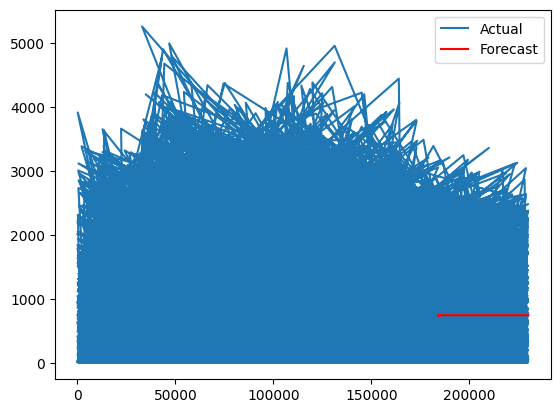

In [72]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(Y_test, forecast)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Visualize the predictions
import matplotlib.pyplot as plt
plt.plot(Y_test, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()
